# Restaurants Rating prediction By Anusha S Suvarna

#### dataset used- zomato.csv
#### restaurants rate prediction in zomato
#### It is a regression problem

###### install plotly tool -  used to plot graph
###### conda install -c plotly plotly

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os


In [4]:
# get current working directory
os.getcwd()

'C:\\Users\\hp\\Batch 67 Day 33'

In [5]:
# change current working directory
os.chdir ('C:\\Users\\hp\\OneDrive\\Desktop\\twinkle\\DS\\Batch 67 Day 33\\Project 11 Flask Project and Deployment\\')
os.getcwd()


'C:\\Users\\hp\\OneDrive\\Desktop\\twinkle\\DS\\Batch 67 Day 33\\Project 11 Flask Project and Deployment'

### Load Dataset

In [6]:
# load data
data = pd.read_csv('zomato.csv')
display(data)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [7]:
# check for number of rows and columns in thr data
display(data.shape)

(51717, 17)

In [8]:
# check for datatypes of each column
print (data.dtypes )

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


In [9]:
# check for null values
print (data.isna().sum() )

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [10]:
# to know rating prediction--> url and phone column doesnt have any significance , so we drop it
df=data.drop(['url','phone'],axis=1)

In [11]:
#  check for duplicate records
df.duplicated().sum()

43

In [12]:
# display all duplicate records
df[df.duplicated()]

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
596,"572, 30th Main, 3rd Stage, Banashankari, Banga...",My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,NaN,"Continental, Asian, North Indian, Tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...","['MTH Signature Soup', 'Minestrone Veg', 'Broc...",Dine-out,Banashankari
7599,"17, Thubarahalli Village, Hobli, Varthur Main ...",Nawab Di Biryani,Yes,No,NEW,0,Whitefield,"Takeaway, Delivery",NaN,"Biryani, Mughlai",400,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...","['Paneer Tikka Biryani', 'Veg Lucknowi Biryani...",Delivery,Brookefield
9464,"744, 13th Main, 7th Cross, BTM 2nd Stage, BTM,...",Vyanjan,Yes,No,3.9/5,201,BTM,Quick Bites,"Poha, Jalebi, Paratha, Bhindi Masala, Kachori,...","North Indian, Street Food",300,"[('Rated 3.0', ""RATED\n Nice place, it's for ...","['Jeera Rice', 'Khichdi', 'Plain Tawa Roti', '...",Delivery,BTM
9466,"607, First Floor, 80 Feet Road, 6th Block, Kor...",Carrots,Yes,Yes,4.1/5,600,Koramangala 6th Block,Casual Dining,"Pizza, Pasta, Salads, Masala Chai, Soya Butter...","Italian, North Indian, Healthy Food, Desserts","1,100","[('Rated 5.0', ""RATED\n It's the first vegan ...",[],Delivery,BTM
9467,"Building 58, New 3, A Main Road Marenahalli, J...",Eatsomnia,Yes,No,NEW,0,JP Nagar,Delivery,NaN,"North Indian, South Indian, Chinese, Continental",500,"[('Rated 1.0', ""RATED\n The worst food I ate ...",[],Delivery,BTM
9468,"6th Cross Road, Koramangala 6th Block, Bangalore",Rolls & Co,Yes,No,3.9/5,213,Koramangala 6th Block,Quick Bites,"Rolls, Chicken Wings, Shawarma, Chicken Tikka ...","Burger, Beverages, Rolls",400,"[('Rated 2.0', 'RATED\n Order : Peri Peri Fri...",[],Delivery,BTM
9469,"10, Opposite Forum Mall, Taverekere, Suddagunt...",Fogg,No,Yes,NEW,0,BTM,Quick Bites,NaN,"Fast Food, Chinese",200,"[('Rated 5.0', 'RATED\n Seafood soup - A Thai...",[],Delivery,BTM
9470,"Koramangala 1st Block, Bangalore",The Paratha Stories,Yes,No,3.3/5,36,Koramangala 1st Block,Delivery,NaN,North Indian,400,"[('Rated 3.0', 'RATED\n There is enough scope...",[],Delivery,BTM
9471,"29, 7th Cross Road, Bhavani Nagar, Suddagunte ...",Mycakeshop,Yes,No,NaN,0,BTM,Bakery,NaN,"Bakery, Desserts",300,"[('Rated 5.0', 'RATED\n I loved cake nice tru...","['Red Velvet Cake', 'Truffle Chocolate Cake', ...",Delivery,BTM
9549,"51, 5th Main, 60 Feet Road, BNG Homestay Build...",Bisimillah Biriyani,No,No,3.5/5,11,BTM,Quick Bites,NaN,"Biryani, Fast Food",300,"[('Rated 4.0', 'RATED\n Very delicious food @...",[],Delivery,BTM


In [13]:
# drop the dublicate record. then try to check if any duplicate records are present still
df.drop_duplicates(inplace=True)
display(df.duplicated().sum())


0

In [14]:
# display data in dataframe
display(df)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [15]:
df.dropna(how='any',inplace=True)
display (df.isnull().sum())


address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [16]:
# display data 
display(df)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [17]:
# display all the column names 
display(df.columns)

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [18]:
# rename the columns
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})
display (df.columns)


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [19]:
# display data
display (df)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


## Cleaning the data

In [21]:
# display unique cost- for approx 2 people
display (df['cost']. unique())

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

##### cost is ranging from Rs 40 - Rs 4500

In [23]:
# remove comma, to convert cost to integer or float
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' with nothing in the cost

In [24]:
# display unique cost - its in string datatype
display (df['cost']. unique())

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1400',
       '1350', '2200', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [25]:
# convert cost to float datatype
df['cost'] = df['cost'].astype(float)


In [26]:
# display unique cost  - its in float datatype
display (df['cost']. unique())

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [27]:
# display datatype of all columns
display (df.dtypes)

address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [28]:
# display unique rate - its datatype is object
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [29]:
# display value count of rate column
display(df['rate'].value_counts().head(60))

3.9/5     1691
3.9 /5    1555
4.0/5     1475
4.0 /5    1427
4.1/5     1417
4.1 /5    1410
3.8/5     1332
3.8 /5    1151
4.2 /5    1122
4.2/5     1002
4.3 /5     909
3.7/5      875
3.7 /5     771
4.3/5      771
4.4 /5     623
4.4/5      519
3.6/5      447
3.6 /5     431
4.5 /5     404
3.5/5      260
4.5/5      244
3.5 /5     222
3.4 /5     185
3.0/5      185
4.6 /5     175
2.9/5      175
3.4/5      166
3.1/5      163
2.8 /5     163
2.8/5      158
NEW        147
3.1 /5     144
2.9 /5     138
3.2/5      137
3.3/5      127
4.6/5      125
3.2 /5     113
3.0 /5     106
2.7/5      105
3.3 /5      92
4.7 /5      86
2.7 /5      85
4.7/5       81
2.6/5       77
2.6 /5      61
4.8 /5      43
2.5 /5      32
2.4/5       30
4.9 /5      30
4.9/5       25
2.3/5       25
2.5/5       25
2.4 /5      24
4.8/5       23
2.3 /5      20
2.2/5       19
2.1 /5      13
2.1/5       11
2.2 /5       7
2.0 /5       7
Name: rate, dtype: int64

In [30]:
# exclude the record where rate is new ( new means restaurant might be new so it has no rating so far)
df = df.loc[df.rate !='NEW'] 
display(df)


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [31]:
# display unique rate
display (df['rate']. unique())

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [32]:
# remove  /5 in rating
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))
# display unique record
display (df['rate'].unique())


array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

## Visualizations

### Famous Restaurants 

In [33]:
# check how many restaurant data we have - display name and value count of restaurant
df['name'].value_counts()

Onesta                 85
Empire Restaurant      67
KFC                    59
McDonald's             57
Pizza Hut              56
                       ..
Insomniac's Delight     1
Popular Burger          1
Fresh 'N' Grills        1
Lassi Resto Cafe        1
Fujian Express          1
Name: name, Length: 3157, dtype: int64

In [34]:
# display top 20 famous restaurants
df['name'].value_counts().head(20)

Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Polar Bear                48
Smoor                     47
Mani's Dum Biryani        47
Pizza Stop                46
Mainland China            45
Chung Wah                 45
Subway                    45
Lakeview Milkbar          44
eat.fit                   44
Hammered                  44
Name: name, dtype: int64

In [35]:
# create another dataframe chains with top 20 records
chains=df['name'].value_counts()[:20]
display(chains)


Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Polar Bear                48
Smoor                     47
Mani's Dum Biryani        47
Pizza Stop                46
Mainland China            45
Chung Wah                 45
Subway                    45
Lakeview Milkbar          44
eat.fit                   44
Hammered                  44
Name: name, dtype: int64

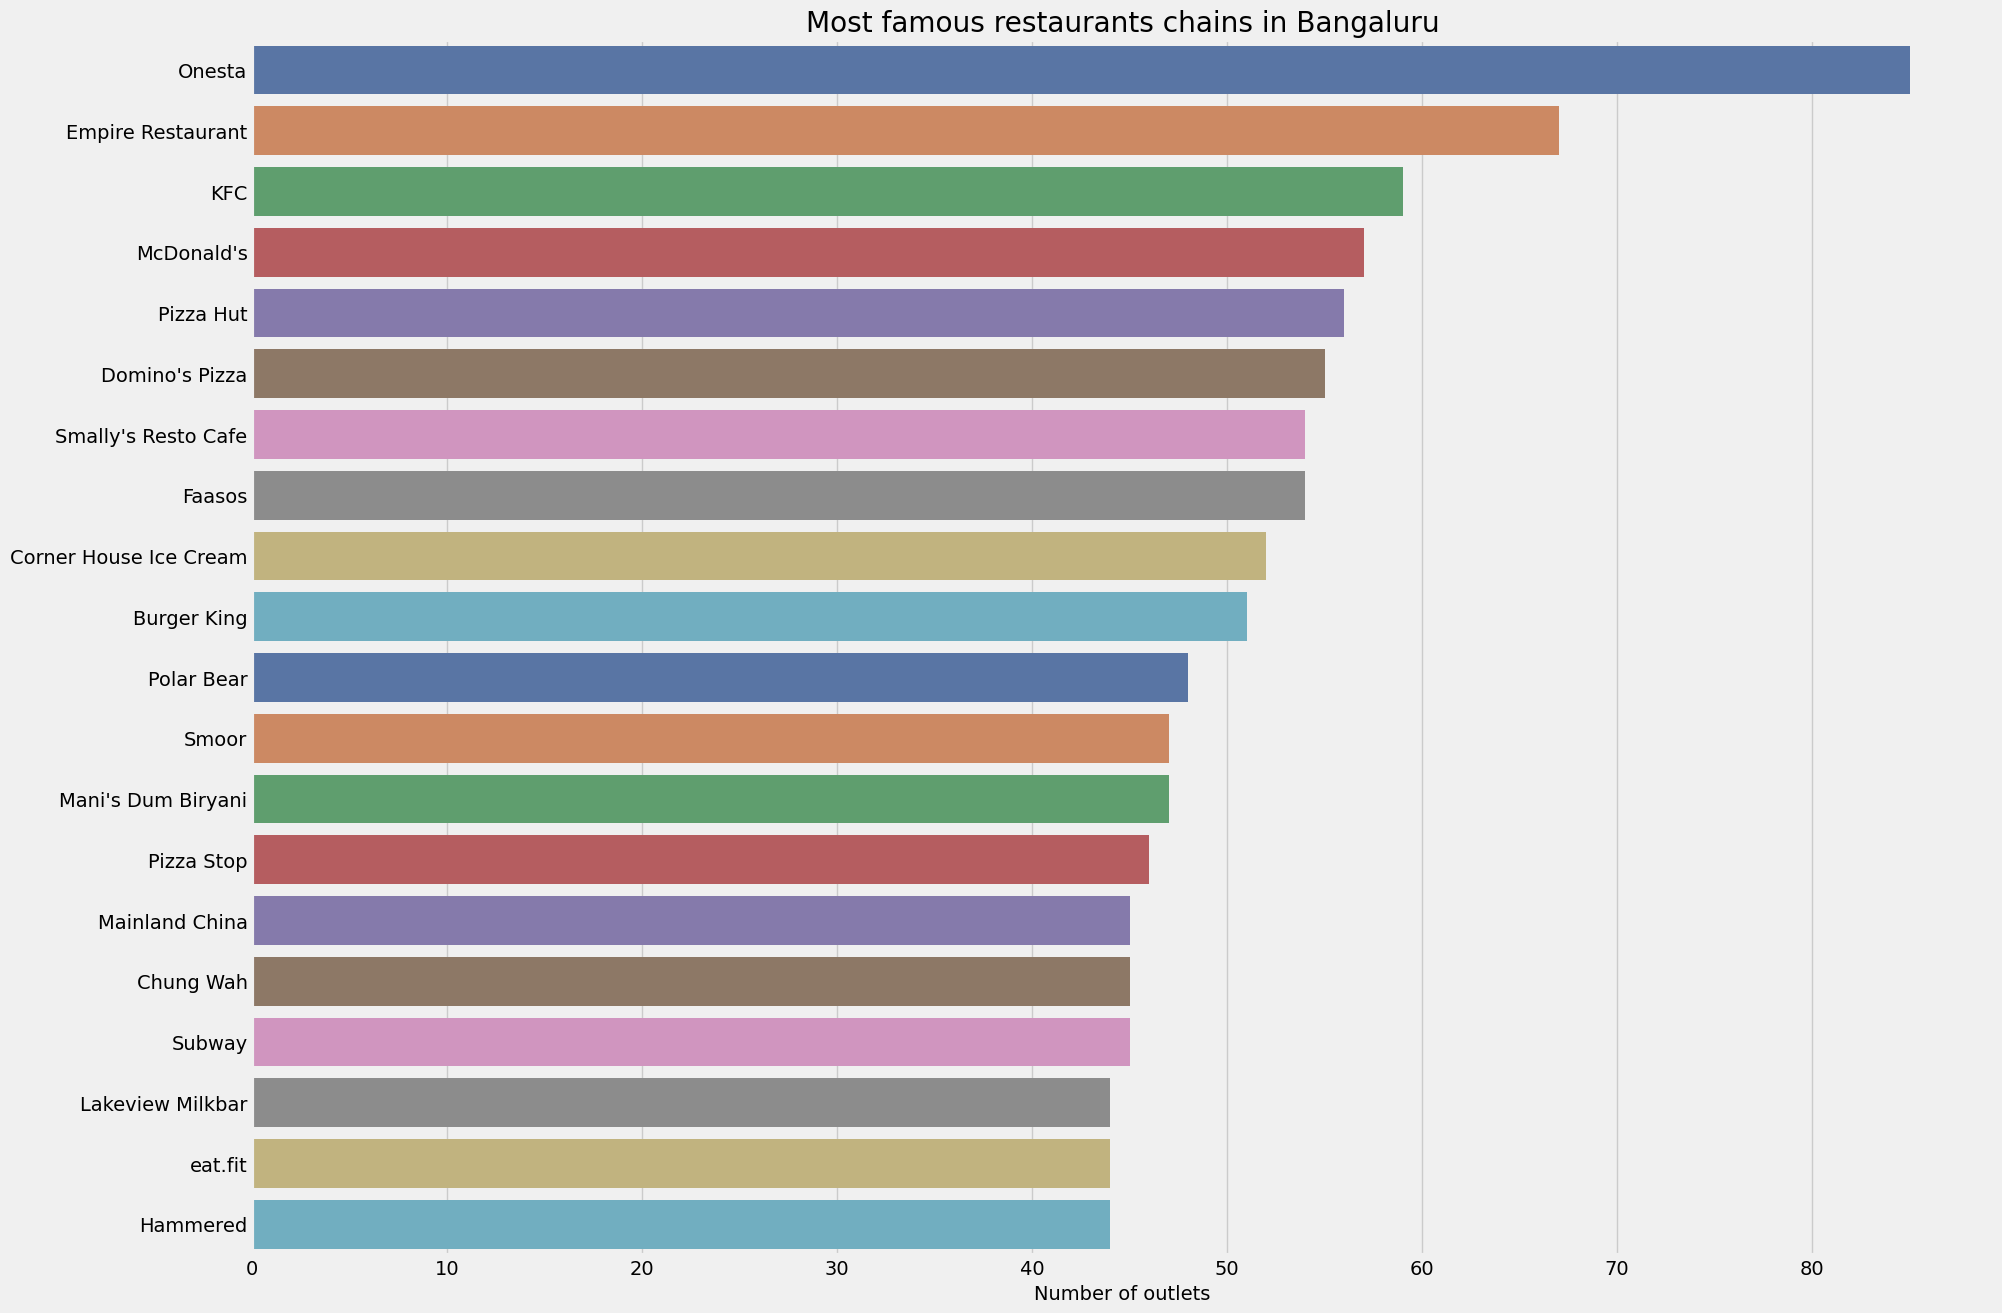

In [36]:
# create a bar chart of the top 20 restarants and its number of branches
# chains means restaurant name, chain.index means value_count of restaurant
plt.figure(figsize=(20,15))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

### Restaurants with Delivering online or not

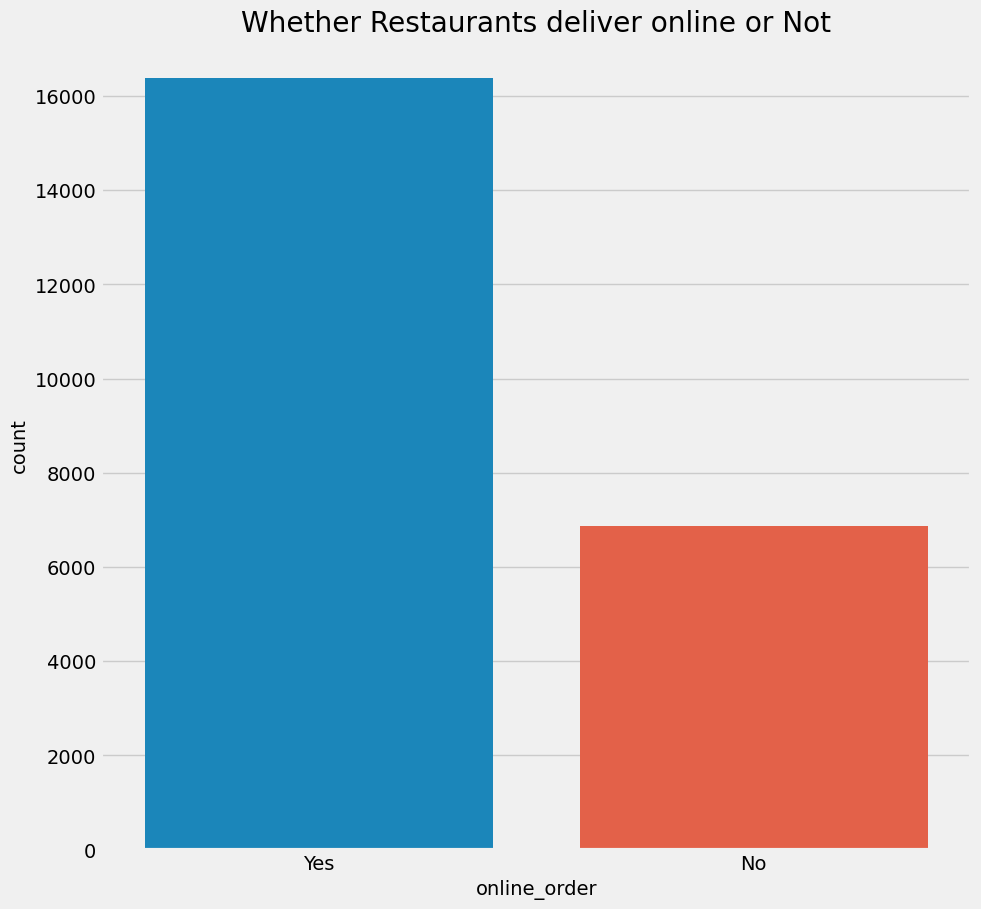

In [37]:
# display the restaurants with online food order service
sns.countplot(x = 'online_order', data =df)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Restaurants deliver online or Not')
plt.show()          

### Restaurants with Table Booking 

In [38]:
# display how many restaurants have the booking facilities
display(df['book_table'].value_counts())

No     17191
Yes     6057
Name: book_table, dtype: int64

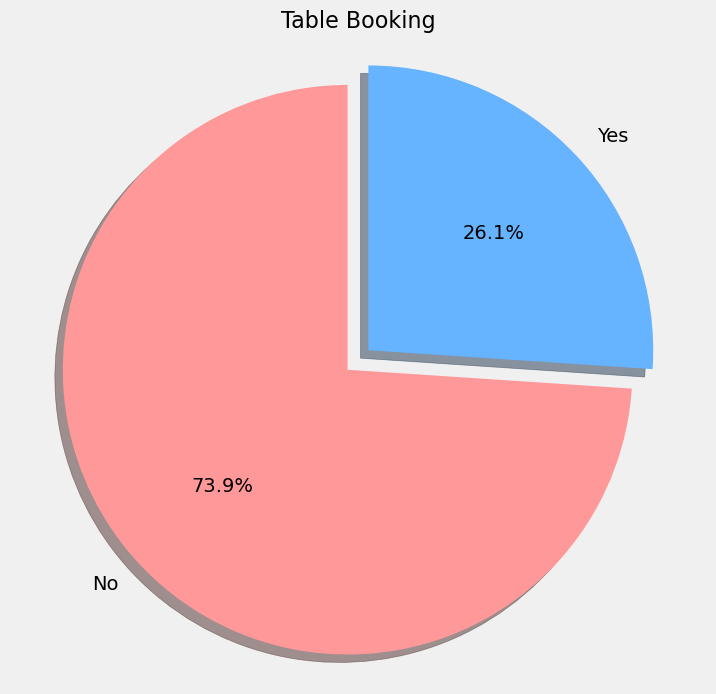

In [39]:
# pie chart - book table
import matplotlib.pyplot as plt
import pandas as pd

x = df['book_table'].value_counts()

labels = x.index
sizes = x.values
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Table Booking', fontsize=16)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Rating distribution

<Axes: xlabel='rate', ylabel='Density'>

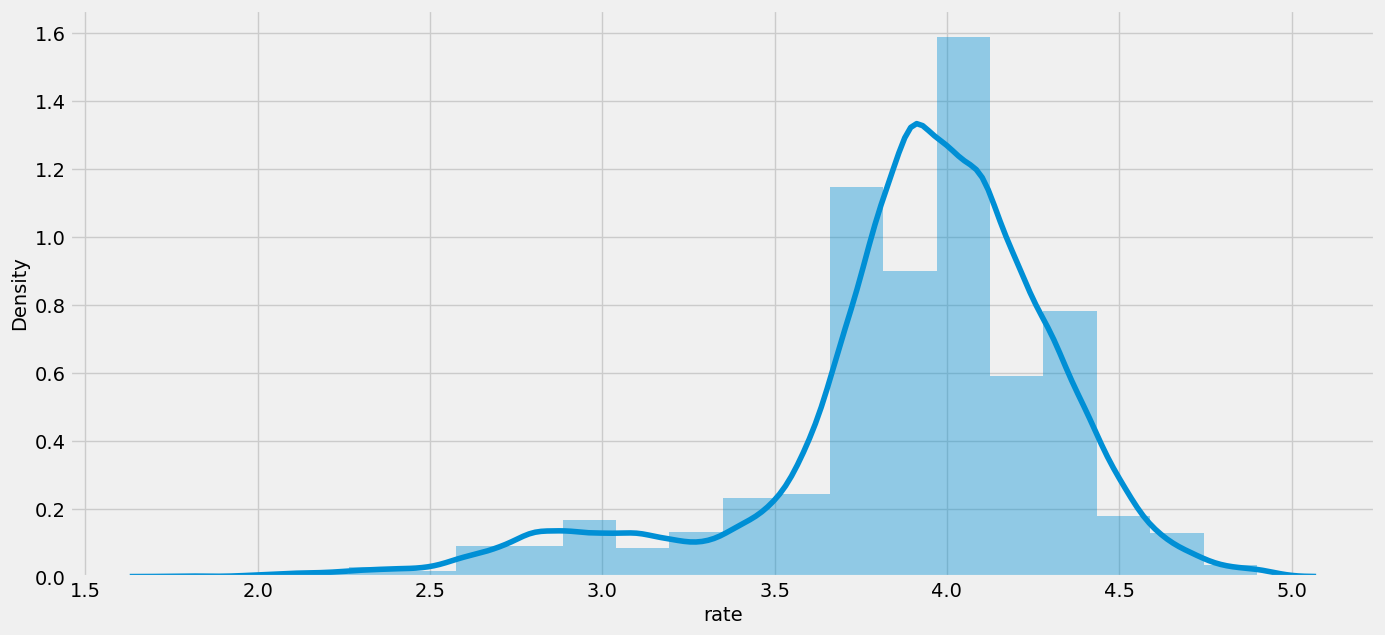

In [40]:
#Rating distribution 
plt.figure(figsize=(15,7))
sns.distplot(df['rate'],bins=20)

##### Most of the ratings are within 3.5 and 4.5 range

In [41]:
# display unique ratings
display(df['rate'].unique())

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [42]:
# dispplay minimum rating
display (df['rate'].min())

'1.8'

In [43]:
# display maximum rating
display(df['rate'].max())

'4.9 '

In [44]:
# convert rating column (string) to float column
df['rate']=df['rate'].astype(float)
# display unique rating
display(df['rate'].unique())


array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

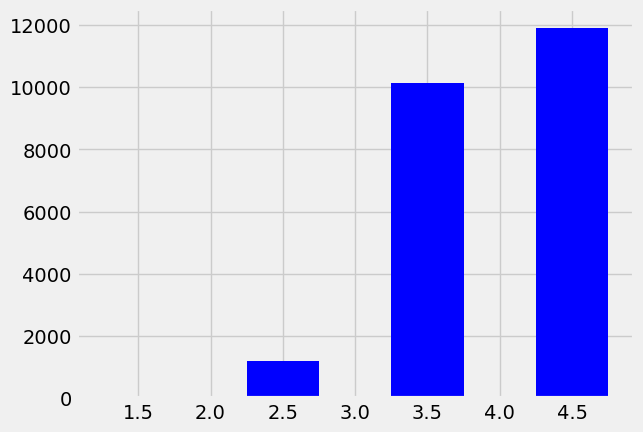

In [45]:
# create histogram with rating
group= [1,2,3,4,5]
plt.hist (df['rate'],group,histtype = 'bar',rwidth =0.5,color = 'b')
plt.show()


In [46]:
# count the number of restaurants where rating is between 1 and 2
gr_1to2=((df['rate']>=1) & (df['rate']<2)).sum()
display (gr_1to2)


5

In [47]:
# count the number of restaurants where rating is between 2 and 3
gr_2to3=((df['rate']>=2) & (df['rate']<3)).sum()
display (gr_2to3)


1179

In [48]:
# count the number of restaurants where rating is between 3 and 4
gr_3to4=((df['rate']>=3) & (df['rate']<4)).sum()
display (gr_3to4)


10153

In [49]:
 # count the number of restaurants where rating is greater than 4
gr_4to5=(df['rate']>=4).sum()
display (gr_4to5)


11911

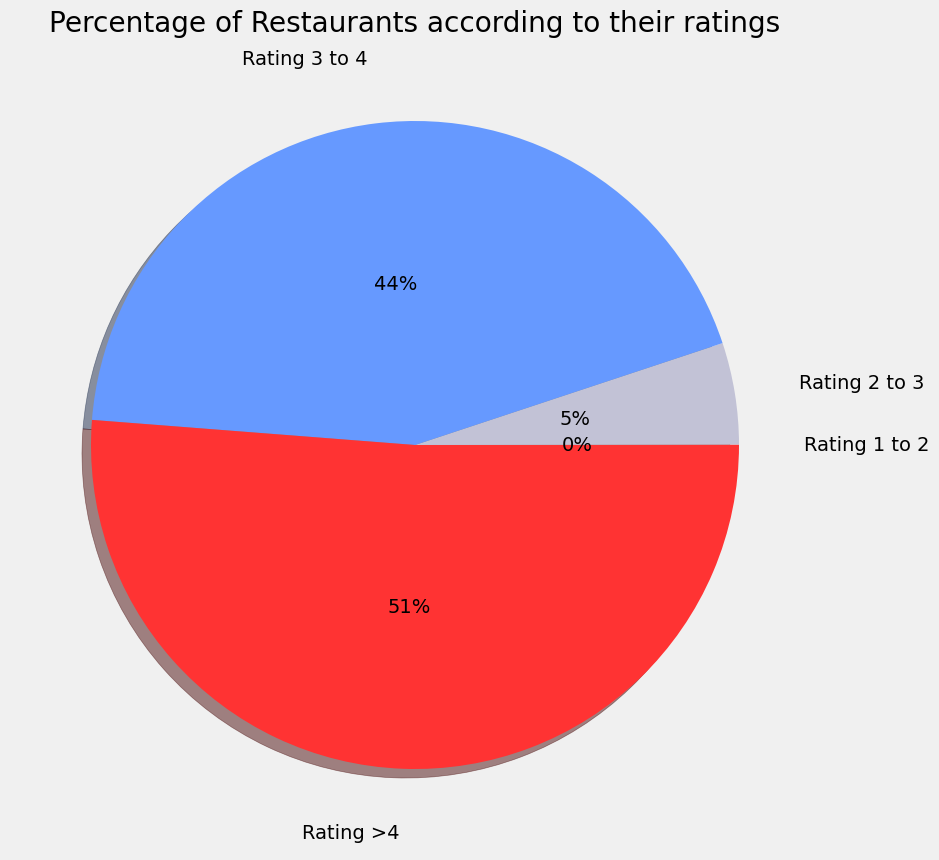

In [50]:
# create a pie chart with rating - Percentage of Restaurants according to their rating
slices=[gr_1to2,gr_2to3,gr_3to4,gr_4to5]   

labels=['Rating 1 to 2','Rating 2 to 3','Rating 3 to 4','Rating >4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()



### Service Type

In [52]:
# count distint value by service type - (what type of restaurant it is)
display(df['type'].value_counts())

Delivery              10657
Dine-out               8006
Desserts               1364
Cafes                  1066
Drinks & nightlife      879
Buffet                  753
Pubs and bars           523
Name: type, dtype: int64

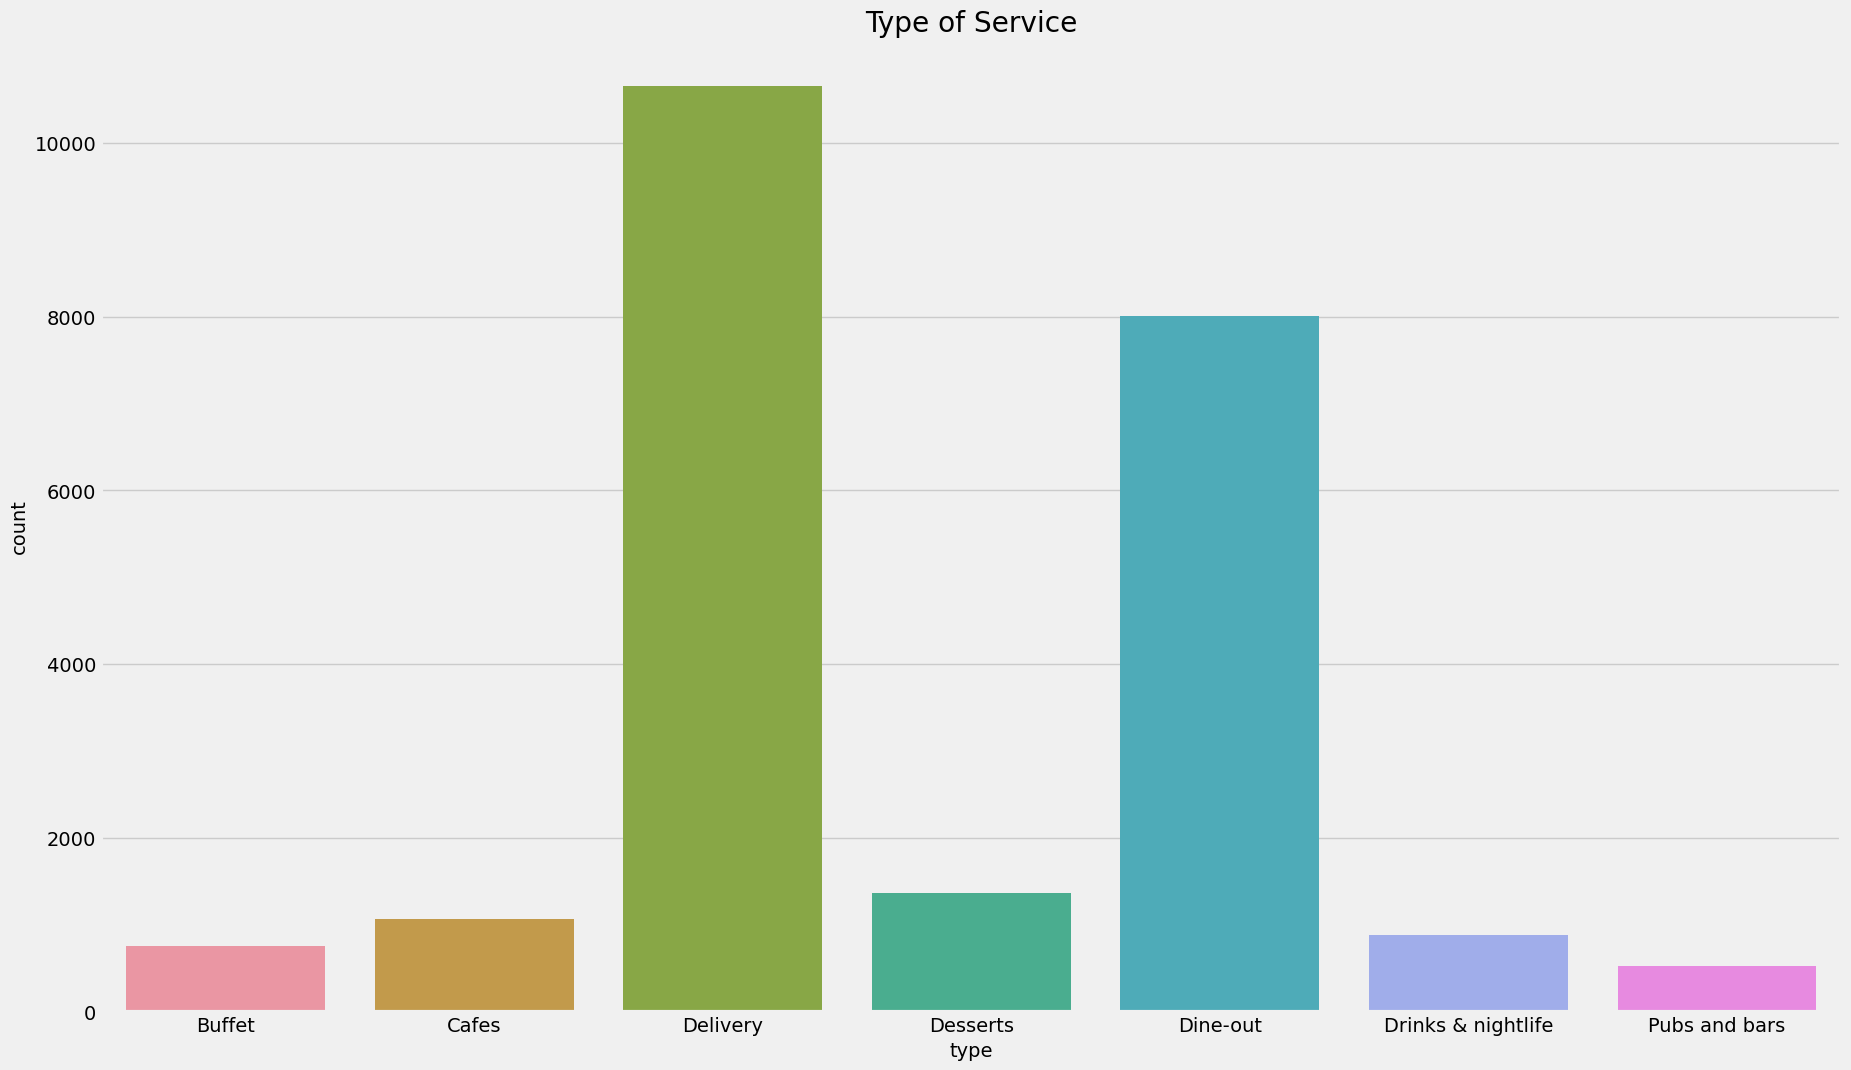

In [53]:
# Service type- count plot
# here the two main service typres are delivery and dine-out
sns.countplot(x = 'type' , data = df)
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.title('Type of Service')
plt.show()



### Distribution of Cost of Food for Two People

In [55]:
# display unique cost
# cost is ranging from 40 - 6000
two_people_cost = df['cost'].unique()
display(np.sort(two_people_cost))


array([  40.,  100.,  120.,  150.,  180.,  200.,  230.,  250.,  300.,
        330.,  350.,  400.,  450.,  500.,  550.,  600.,  650.,  700.,
        750.,  800.,  850.,  900.,  950., 1000., 1050., 1100., 1200.,
       1250., 1300., 1350., 1400., 1450., 1500., 1600., 1650., 1700.,
       1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
       2700., 2800., 3000., 3200., 3400., 3500., 3700., 4000., 4100.,
       4500., 5000., 6000.])

In [56]:
# display number of restaurant in each group
df.groupby('cost').size()

cost
40.0         8
100.0      120
120.0        2
150.0      371
180.0       17
200.0      869
230.0       10
250.0      697
300.0     1688
330.0        4
350.0      553
400.0     2478
450.0      719
500.0     2321
550.0      440
600.0     2168
650.0      644
700.0     1202
750.0      651
800.0     1647
850.0      122
900.0      524
950.0       47
1000.0    1218
1050.0       4
1100.0     450
1200.0     903
1250.0       8
1300.0     496
1350.0      18
1400.0     447
1450.0       5
1500.0     841
1600.0     237
1650.0       6
1700.0     229
1800.0     193
1900.0      58
2000.0     298
2100.0      60
2200.0      39
2300.0       1
2400.0      22
2500.0     143
2600.0       4
2700.0       2
2800.0      31
3000.0     159
3200.0       2
3400.0      13
3500.0      25
3700.0       1
4000.0      24
4100.0       4
4500.0       2
5000.0       1
6000.0       2
dtype: int64

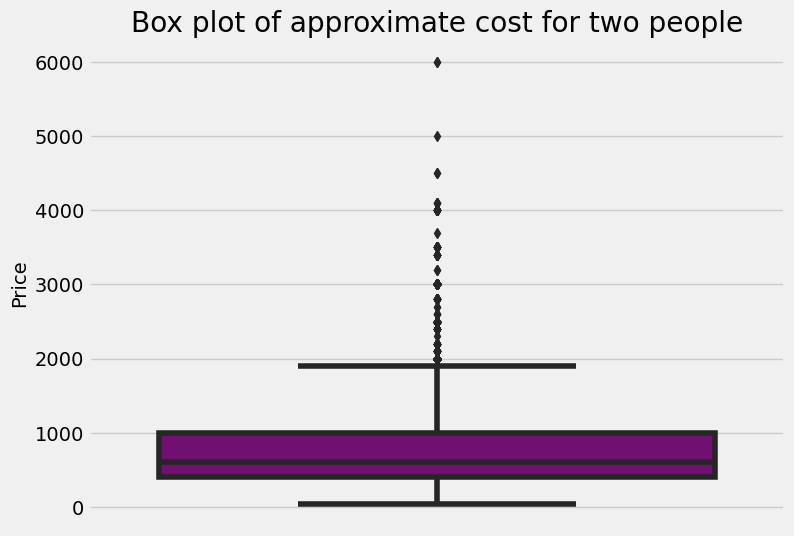

In [57]:
# create a Box Plot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['cost'], color='purple')  # Using a single color for all boxes
plt.title('Box plot of approximate cost for two people')
plt.ylabel('Price')

plt.show()


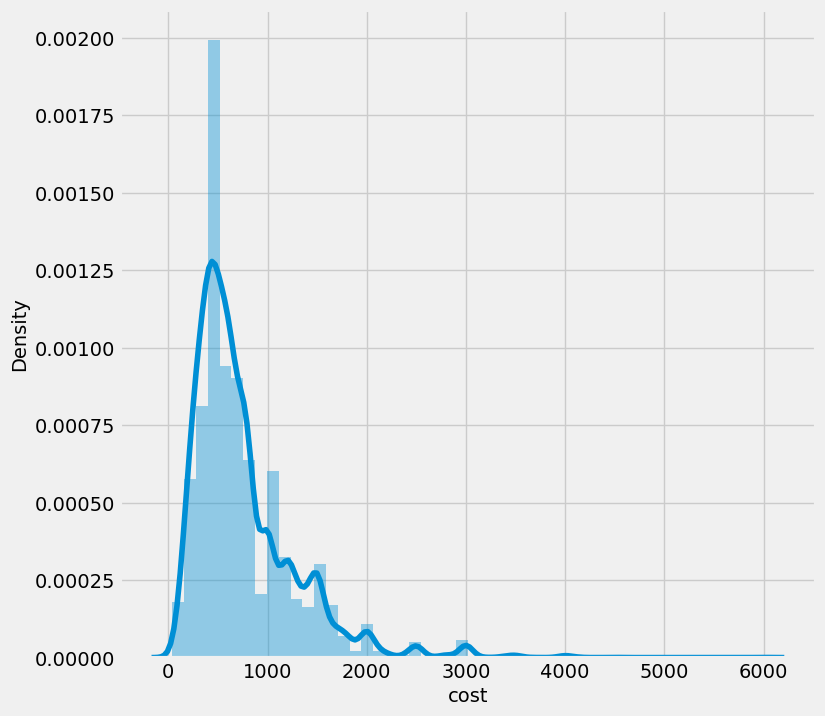

In [58]:
# distribution plot - for how the data (cost) is distributed
# max number of cost comes under 500-600 range
# we get right skewed graph
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()


###### we dont do anything for above outlier treatment because it is a valid scenario

### Most Liked Food

In [61]:
# gives no of rows and columns
df.shape

(23248, 15)

In [62]:
# displays no. of rows
df.shape[0]

23248

In [63]:
# Extract the favourite food from column – dish_liked
# re = regular expression (use for splitting words). 
# The split is used since dish liked column has multiple values separated by comma, extract each dish, create a list (append each value to list)
import re
df.index=range(df.shape[0])
likes=[]                          # creating empty list
for i in range(df.shape[0]):      # for loop
    array_split=re.split(',',df['dish_liked'][i])  # scan each and every record. split the dish_liked column based on comma
    for item in array_split:              # for loop to append the dish/item to empty list- likes
        likes.append(item)


In [64]:
# display number of dishes and  dishes
display ('Number of dishes', len(likes))
display(likes)


'Number of dishes'

126848

['Pasta',
 ' Lunch Buffet',
 ' Masala Papad',
 ' Paneer Lajawab',
 ' Tomato Shorba',
 ' Dum Biryani',
 ' Sweet Corn Soup',
 'Momos',
 ' Lunch Buffet',
 ' Chocolate Nirvana',
 ' Thai Green Curry',
 ' Paneer Tikka',
 ' Dum Biryani',
 ' Chicken Biryani',
 'Churros',
 ' Cannelloni',
 ' Minestrone Soup',
 ' Hot Chocolate',
 ' Pink Sauce Pasta',
 ' Salsa',
 ' Veg Supreme Pizza',
 'Masala Dosa',
 'Panipuri',
 ' Gol Gappe',
 'Onion Rings',
 ' Pasta',
 ' Kadhai Paneer',
 ' Salads',
 ' Salad',
 ' Roti',
 ' Jeera Rice',
 'Farmhouse Pizza',
 ' Chocolate Banana',
 ' Virgin Mojito',
 ' Pasta',
 ' Paneer Tikka',
 ' Lime Soda',
 ' Prawn Pizza',
 'Pizza',
 ' Mocktails',
 ' Coffee',
 ' Nachos',
 ' Salad',
 ' Pasta',
 ' Sandwiches',
 'Waffles',
 ' Pasta',
 ' Coleslaw Sandwich',
 ' Choco Waffle',
 ' Tacos',
 ' Momos',
 ' Cheese Nachos',
 'Waffles',
 ' Pasta',
 ' Crispy Chicken',
 ' Honey Chilli Chicken',
 ' Sandwich',
 ' Coffee',
 ' Crepe',
 'Mocktails',
 ' Peri Fries',
 ' Lasagne',
 ' Pizza',
 ' Chicken 

In [65]:
# display index - how many records are present
df.index=range(df.shape[0])
display (df.index)


RangeIndex(start=0, stop=23248, step=1)

In [66]:
# display top 30 dishes value count 
print("Count of Most liked dishes")
favourite_food = pd.Series(likes).value_counts()
display(favourite_food.head(30))


Count of Most liked dishes


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

In [67]:
# display  favourite_food
favourite_food

 Pasta                   2692
 Pizza                   1915
 Cocktails               1880
 Burgers                 1736
 Mocktails               1623
                         ... 
 Cheesy Italian Fries       1
 Corn Augratin              1
Aam Panna                   1
 Hot Choco Fudge            1
 Vegetable Dumplings        1
Length: 3494, dtype: int64

##### Pasta is the favourite food in the entire city

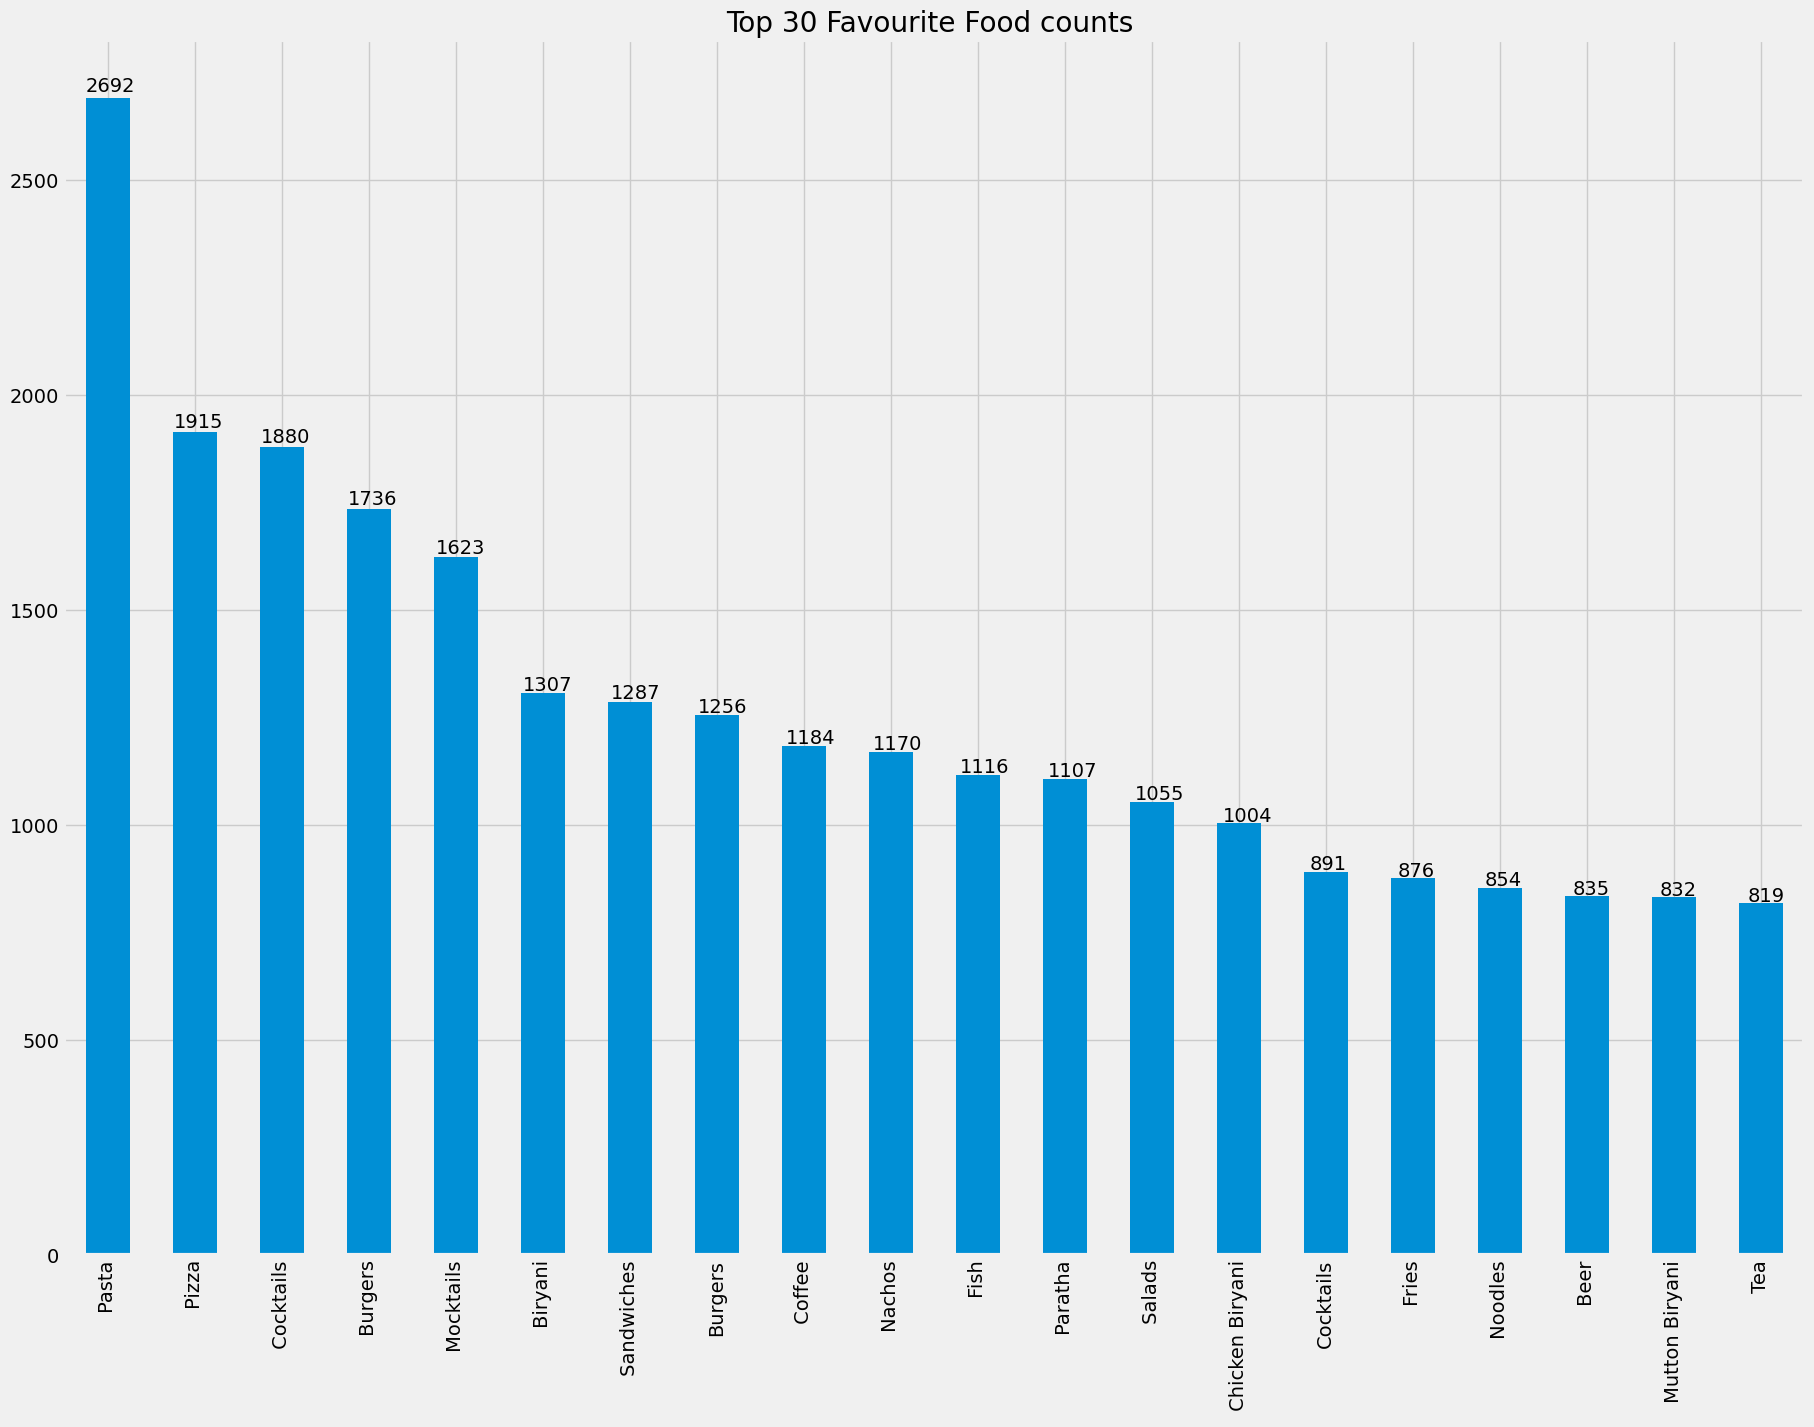

In [68]:
# Create Bar Graph with top 20 dishes 
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(20,15),title = 'Top 30 Favourite Food counts ')
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))



##### We can infer from the analysis that the 5 most liked dishes are Pasta,Pizza,Cocktails,Burgers,and Mocktails

### Restaurant Type 

In [70]:
# restaurant type and value count
df['rest_type'].value_counts()

Casual Dining                7326
Quick Bites                  5250
Cafe                         2375
Dessert Parlor               1083
Casual Dining, Bar            985
                             ... 
Bar, Pub                        5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: rest_type, Length: 73, dtype: int64

In [71]:
# restaurant type and value count of top 50 restaurants
print (df['rest_type'].value_counts().head(50))

Casual Dining                    7326
Quick Bites                      5250
Cafe                             2375
Dessert Parlor                   1083
Casual Dining, Bar                985
Delivery                          704
Bar                               358
Takeaway, Delivery                342
Bar, Casual Dining                336
Pub                               324
Fine Dining                       311
Casual Dining, Cafe               304
Lounge                            298
Pub, Casual Dining                224
Food Court                        220
Bakery                            166
Cafe, Casual Dining               159
Dessert Parlor, Cafe              143
Beverage Shop, Quick Bites        137
Beverage Shop                     137
Cafe, Bakery                      128
Casual Dining, Pub                124
Microbrewery, Casual Dining       121
Cafe, Dessert Parlor              111
Sweet Shop                        105
Bakery, Quick Bites                96
Sweet Shop, 

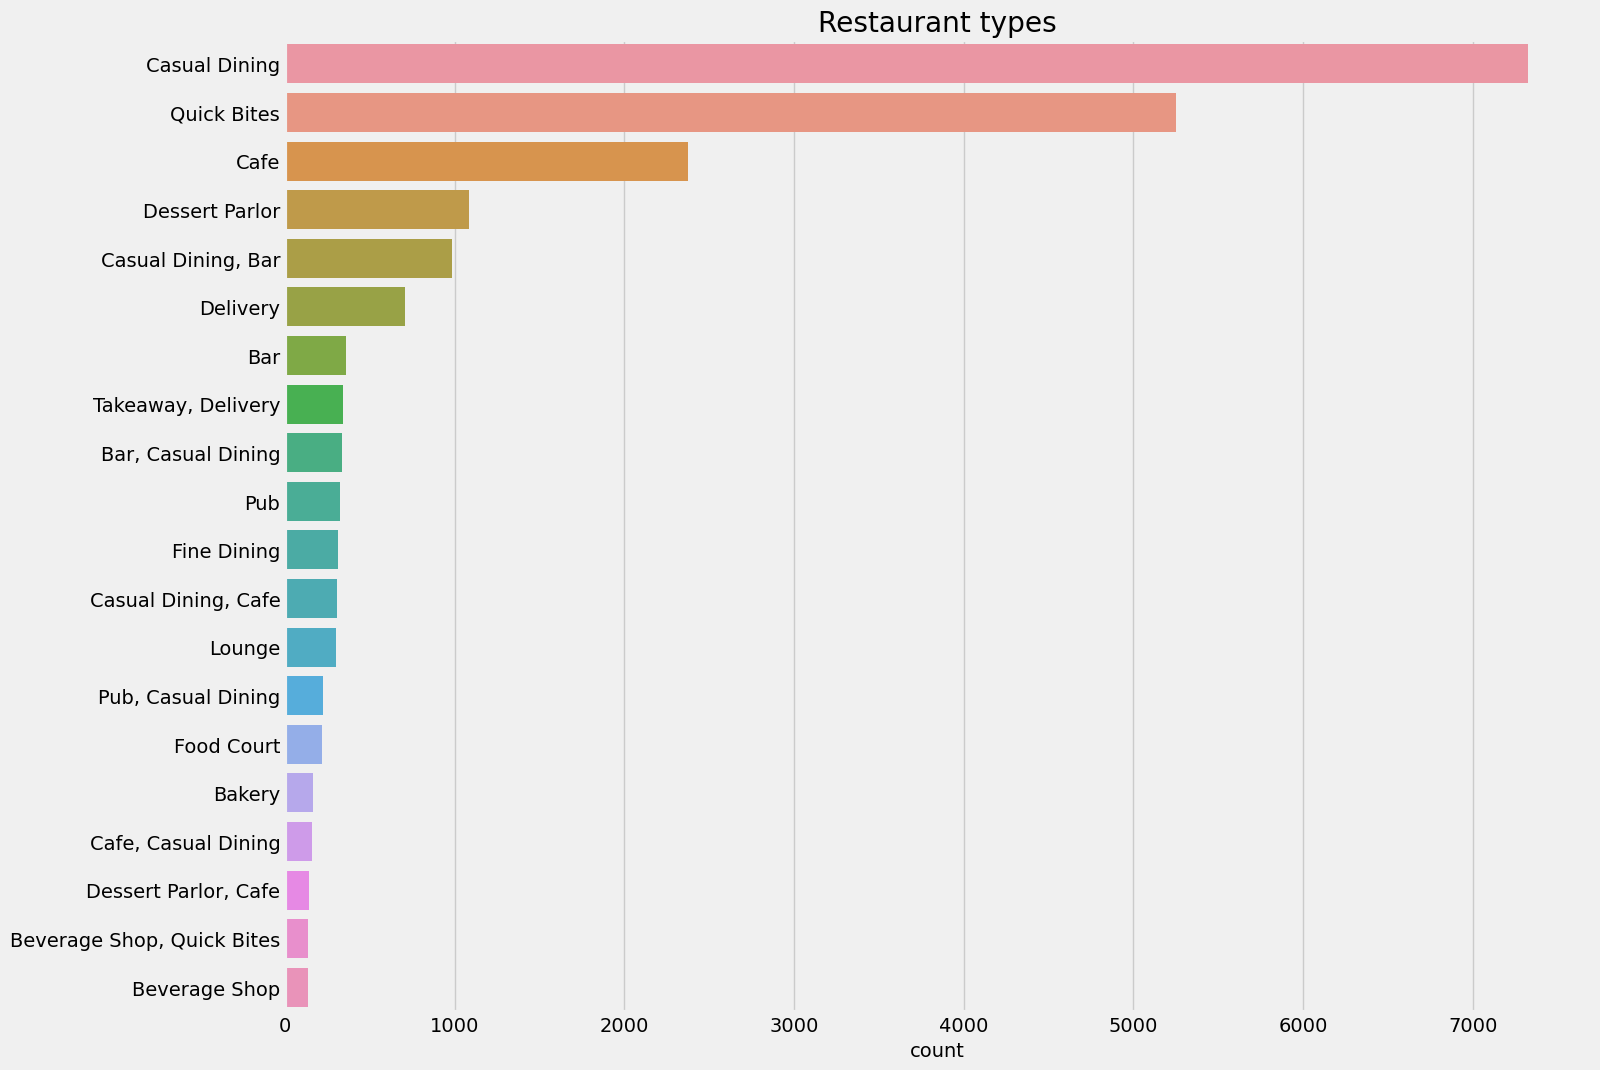

In [72]:
#Create Graph with top 20 restaurant type 
plt.figure(figsize=(15,12))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(x= rest,y =rest.index)
plt.title("Restaurant types")
plt.xlabel("count")
plt.show()

##### Casual Dining, Quick Bites and Cafe are the 3 most common types of Restaurants

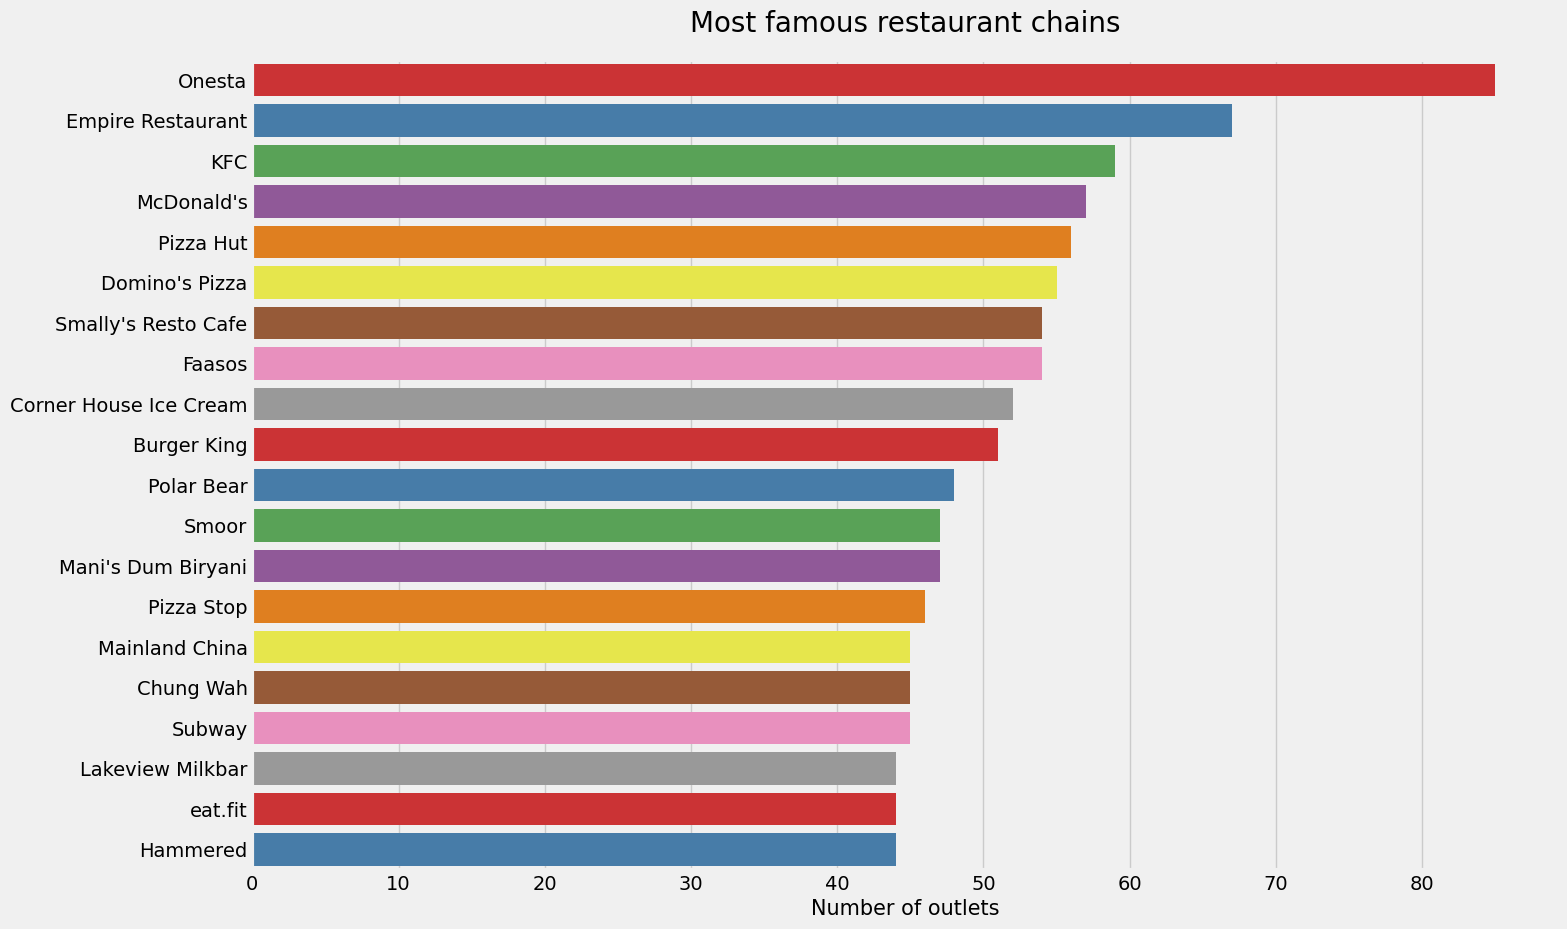

In [73]:
# Famous Restaurants based on how many outlets are there in that city
plt.figure(figsize=(15,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.show()

## Model Creation

In [75]:
# Display top 5 records 
display(df.head())

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [76]:
# Convert the online_order categorical variables into a numeric format
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0
display (df)


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23243,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,1,Yes,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
23244,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,0,No,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
23245,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,0,No,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
23246,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,0,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [77]:
# Display number of records in each category
print (df.online_order.value_counts())

1    16378
0     6870
Name: online_order, dtype: int64


In [78]:
# Change the datatype to Number 
df.online_order = pd.to_numeric(df.online_order)
# display top 20 records 
display (df.head(20))


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,1,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,1,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
7,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,1,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
8,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,1,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
9,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,1,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari


In [79]:
# Update Column book_table to 1 and 0 
# change the string categorical into to a categorical int
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0
display (df)


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23243,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,1,1,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
23244,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
23245,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,0,0,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
23246,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [80]:
# Change the data type
df.book_table = pd.to_numeric(df.book_table)
print (df.book_table.dtypes)


int64


In [81]:
# Display number of records in each category
# display no. of records with book_table facility
display(df.book_table.value_counts())

0    17191
1     6057
Name: book_table, dtype: int64

### Label Encoding

In [82]:
#Label Encoding of required column
#Label encode the categorical variables to make it easier to build algorithm

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)



In [83]:
# display data
df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23243,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,1,1,3.8,128,84,5,"Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...",1318,1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",5047,Pubs and bars,Whitefield
23244,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,77,84,38,Rooftop Ambience,878,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",5047,Pubs and bars,Whitefield
23245,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,0,0,2.8,161,84,21,"Salads, Coffee, Breakfast Buffet, Halwa, Chick...",539,1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",5047,Pubs and bars,Whitefield
23246,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,0,0,2.5,81,84,21,"Biryani, Andhra Meal",80,800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",5047,Pubs and bars,Whitefield


In [84]:
# Get the required numeric columns to create model 
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
# write the data extracted to csv file
my_data.to_csv('Zomato_df.csv')
display (my_data)


,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,0,4.1,787,1,20,594,800.0,5047
2,1,0,3.8,918,1,16,484,800.0,5047
3,0,0,3.7,88,1,62,1587,300.0,5047
4,0,0,3.8,166,4,20,1406,600.0,5047
...,...,...,...,...,...,...,...,...,...
23243,1,1,3.8,128,84,5,1318,1200.0,5047
23244,0,0,3.9,77,84,38,878,2000.0,5047
23245,0,0,2.8,161,84,21,539,1200.0,5047
23246,0,0,2.5,81,84,21,80,800.0,5047


In [85]:
# Create independent Variable 
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
display (x.head())


,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [86]:
# Create Dependent Variable 
y = df['rate']
display(y)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

### Train Test Split

In [87]:
# Train Test Split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)
print (x.shape)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)


(23248, 8)
(16273, 8)
(6975, 8)
(16273,)
(6975,)


### 1. Linear Regression Model

In [89]:
# Create Linear Regression Model
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
print (lr_model)


LinearRegression()


In [90]:
# Prediction and display Accuracy 
from sklearn.metrics import r2_score
y_pred=lr_model.predict(x_test)
display (r2_score(y_test,y_pred))


0.2281882852296676

##### Conclusion: linear regression model accuracy is 22.81%. Hence proved to be not good model for this dataset.

### 2. Random Forest Regressor

In [93]:
# create Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
display (r2_score(y_test,y_predict))


0.8809706960047533

##### Conclusion: Random Forest Regressor model accuracy is 88.09%.

### 3.  Extra Tree Regression

In [96]:
# create Extra Tree Regression model
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)


In [97]:
# Display Accuracy
from sklearn.metrics import r2_score
display(r2_score(y_test,y_predict))


0.9331561067627019

#### Conclusion: Extra Tree Regression model accuracy is 93.41%. Hence proved to be good model for this dataset

In [99]:
# Generate Pickle File 
import pickle 
# Saving model to disk
pickle.dump(ET_Model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))



In [ ]:
"""
Deployment and Integration Overview:

1. Deployment Framework:
- Flask: This Python framework will be used to deploy the program as a web application.

2. Development Environment:
- PyCharm Community Edition: Install this IDE for project development 

3. Project Structure:
- Project Folder: Navigate to the `my_project` folder within PyCharm.
- Model File: `model.py` is responsible for model creation.
- Template Folder: `template` contains the `index.html` file for the web page.
- Integration File: `app.py` will integrate the model and HTML code.
- Data File: `zomato_df.csv` holds clean data used by the program.

4. User Interface:
- `index.html`: This web page features text boxes for user input.
- Input Gathering: Values entered in these text boxes serve as input to the model.

5. Prediction Process:
- User Input: Users provide values for independent variables (e.g., "online order," "book table","Votes","Location","Restaurant Type","Cuisines","Cost","Menu Item") in the web page text boxes.
- Prediction Trigger: Clicking the "Predict" button initiates the process.
- Model Usage: The system leverages the trained model (stored in a pickle file) to generate a prediction.
- Output Display: The predicted rate is displayed on the web page.

These steps outline the key components and workflow for deploying and integrating the program as a web application.

"""